###                                                **A LOOK INTO DISNEY+ SHOWS AND MOVIES [PYTHON EXPLORATORY DATA ANALYSIS]**

In this exploratory data analysis (EDA), we are looking at a data set of all shows/movies avaiable on Disney+ acquired in May 2022 in the United States (via Kaggle) to see if there are any interesting correlations that may lead use to understand what criteria makes a show or movie well rated. By understanding these factors, perhaps we can have better insights on how to create a better reccomendation system and new customer sucustomer retention/engagement.

### **Setting Up Environment**
##### Importing Necessary Libraries

In [115]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from os import path
from wordcloud import WordCloud, STOPWORDS
import nltk as nl
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import kaleido

##### Loading in Data

In [58]:
#Load in csv files
credits = pd.read_csv(r'C:\Users\Kevin\Documents\Disney_Data\credits.csv', index_col=False) 
titles = pd.read_csv(r'C:\Users\Kevin\Documents\Disney_Data\titles.csv', index_col=False)

##### Data Cleaning

Now lets take a brief look at the datasets

In [59]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1535 entries, 0 to 1534
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1535 non-null   object 
 1   title                 1535 non-null   object 
 2   type                  1535 non-null   object 
 3   description           1529 non-null   object 
 4   release_year          1535 non-null   int64  
 5   age_certification     1210 non-null   object 
 6   runtime               1535 non-null   int64  
 7   genres                1535 non-null   object 
 8   production_countries  1535 non-null   object 
 9   seasons               415 non-null    float64
 10  imdb_id               1133 non-null   object 
 11  imdb_score            1108 non-null   float64
 12  imdb_votes            1105 non-null   float64
 13  tmdb_popularity       1524 non-null   float64
 14  tmdb_score            1426 non-null   float64
dtypes: float64(5), int64(

In [60]:
titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,tm74391,Fantasia,MOVIE,Walt Disney's timeless masterpiece is an extra...,1940,G,120,"['animation', 'family', 'music', 'fantasy']",['US'],NaN,tt0032455,7.7,94681.0,57.751,7.4
1,tm67803,Snow White and the Seven Dwarfs,MOVIE,"A beautiful girl, Snow White, takes refuge in ...",1937,G,83,"['fantasy', 'family', 'romance', 'animation', ...",['US'],NaN,tt0029583,7.6,195321.0,107.137,7.1
2,tm82546,Pinocchio,MOVIE,Lonely toymaker Geppetto has his wishes answer...,1940,G,88,"['animation', 'comedy', 'family', 'fantasy']",['US'],NaN,tt0032910,7.5,141937.0,71.160,7.1
3,tm79357,Bambi,MOVIE,Bambi's tale unfolds from season to season as ...,1942,G,70,"['animation', 'drama', 'family']",['US'],NaN,tt0034492,7.3,140406.0,68.136,7.0
4,tm62671,Treasure Island,MOVIE,Enchanted by the idea of locating treasure bur...,1950,PG,96,"['family', 'action']","['GB', 'US']",NaN,tt0043067,6.9,8229.0,10.698,6.5


In [61]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26412 entries, 0 to 26411
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  26412 non-null  int64 
 1   id         26412 non-null  object
 2   name       26412 non-null  object
 3   character  24769 non-null  object
 4   role       26412 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.0+ MB


In [62]:
credits.head()

,person_id,id,name,character,role
0,23433,tm74391,Deems Taylor,Narrator - Narrative Introductions,ACTOR
1,5910,tm74391,Walt Disney,Mickey Mouse (segment 'The Sorcerer's Apprenti...,ACTOR
2,23436,tm74391,Julietta Novis,Soloist (segment 'Ave Maria') (singing voice),ACTOR
3,23434,tm74391,Leopold Stokowski,Himself - Conductor of The Philadelphia Orchestra,ACTOR
4,23441,tm74391,Paul Satterfield,NaN,DIRECTOR


##### Check for Duplicates

In [63]:
# Check for duplicates
duplicateTRows = titles[titles.duplicated(keep='last')]
duplicateTRows.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score


In [64]:
# Check for duplicates
duplicateCRows2 = credits[credits.duplicated(keep='last')]
duplicateCRows2.head()

,person_id,id,name,character,role


We can see that the 'titles' dataset is comprised of 15 columns which various identifiers, while the 'credits' data set is comprised of 5 columns which describes a person and their association to their respective title(s). There also seems to be no duplicates in either dataset, so nothing is required to be transformed in that aspect. However, there are differing amount of entries in the columns of interest we want to analyze such as the imdb/tmdb score with 1108 and 1426 entries respectively and description column with 1529 out of the total 1535 id. To resolve this issue, it would be best to remove rows with null values so we do not underfit any calculations.

##### Cleaning Dataset

In [65]:
#Removing unecessary columns 
ctitles = titles.drop(['imdb_id','imdb_score','imdb_votes','tmdb_popularity','age_certification','production_countries','seasons'], axis=1)
ctitles = ctitles.dropna(subset=['tmdb_score'])
ctitles['genres'] = ctitles.genres.str.strip('[]')
ctitles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1426 entries, 0 to 1531
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1426 non-null   object 
 1   title         1426 non-null   object 
 2   type          1426 non-null   object 
 3   description   1426 non-null   object 
 4   release_year  1426 non-null   int64  
 5   runtime       1426 non-null   int64  
 6   genres        1426 non-null   object 
 7   tmdb_score    1426 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 100.3+ KB


Here I removed all unnecessary columns that I will not be using and decided against using IMDB scores to evaluate the ratings since there are more TMDB entries. This was done because it would provide a greater range and allow for a more accurate analysis with better precision to better represent the entire Disney+ catalog. 

### Analysis
I am curious to see the total distribution of movies and shows across the Release Year History to see how extensive Disney+'s library is. I will be using the original dataset as the rows removed are not relevant and do not provide a full picture of the entire library.   

In [119]:
# Histogram
fig = px.histogram(titles, x = "release_year", color = "type", 
                   marginal= "rug", title="Release Year History of Disney+ Catalog (US)", 
                   labels= { "type" : "Type", "release_year" : "Release Year"},
                   color_discrete_map= {"MOVIE": "#B9D8EB", "SHOW" : "#C39BD3"},
                   template="plotly_dark")

fig.update_layout(paper_bgcolor = '#1A1D29', 
                  plot_bgcolor = '#1A1D29',
                  font = dict(family="Verdana",color = '#FFFFFF', size=13),
                  barmode='overlay'
                 )


![Image](file:///c%3A/Users/Kevin/Documents/Disney_Data/cathistplot.png)

It appears the oldest movie and show date back to 1928 and 1955 respectively. The catalog shows a left skew towards the more current years, however that is to be expected as there is probably more content avaliable and that digital formats are a very modern implementation. Now lets look at how many movies and shows there are respectively. 

In [67]:
#Count # of Movies and Shows
type_count = titles['type'].value_counts().rename_axis('Type').reset_index(name='Counts')

In [99]:
# Bar Chart
fig = px.bar(type_count, x ="Counts", color="Type",
                   title="Total Count of Disney+ Movies & Shows (US)", 
                   labels= { "type" : "Type", "release_year" : "Release Year"},
                   color_discrete_map= {"MOVIE": "#B9D8EB", "SHOW" : "#C39BD3"},
                   template="plotly_dark")
fig.update_yaxes(title='y', visible=False, showticklabels=False)

fig.show()

It appears that the Disney+ library is comprised primarily of movies at 1120 compared to 415 shows. 
 Now lets look at the average runtimes across the collection of movies and shows.

##### Ratings Analysis

Now I would like to glimpse into the average ratings across all the shows and movies available. This time we will used the cleaned data set to avoid the null values. 

In [69]:
 # Box Plot
fig = px.box(ctitles, x ="type", y="tmdb_score", color="type",
    title="TMDB Ratings of Disney+ Movies & Shows (US)", 
    labels= { "tmdb_score" : "Rating (Avg)"},
    color_discrete_map= {"MOVIE": "#B9D8EB", "SHOW" : "#C39BD3"},
    template="plotly_dark")

fig.show()

Just looking at the overall ratings, shows seem to have a higher rating average of 7.7 while movies at 6.7. However, looking at just the rating average only does not provide much insight so I would like to further break down the ratings by looking at the different genres if there is any correlation.

##### Genre Ratings

In [70]:
# Adding new genre columns with each genre split and adding type and tmdb_scores associated with it to it
ratings = ctitles[['tmdb_score','type']].assign(
    genres=ctitles['genres'].str.split(r'\s*,\s*')).explode('genres')
ratings = ratings[ratings.genres != ""]
avg = ratings.groupby(['genres','type'])['tmdb_score'].mean()
avg = avg.reset_index()


Due to the genre columns having multiple entries, it does not follow 1NF and therefore I had to split it and then reformat the dataset so each genre was in its own row so I can then analyze it properly. 

In [71]:
#Double Bar Graph
fig = px.bar(avg, y ="tmdb_score", x ='genres',
                   color= 'type', barmode='group',
                   title="Average TMDB Ratings of Disney+ Movies & Shows by Genres (US)", 
                   labels= { "tmdb_score" : "Rating (Avg)", "genres" : "Genres"},
                   color_discrete_map= {"MOVIE": "#B9D8EB", "SHOW" : "#C39BD3"},
                   template="plotly_dark")

fig.update_yaxes(nticks=9)

fig.show()

In [72]:
#Top 5 Show Genres
sho  = avg[avg.type != 'MOVIE']
sho.nlargest(5,['tmdb_score'])

,genres,type,tmdb_score
35,'war',SHOW,8.400000
21,'horror',SHOW,8.183333
27,'romance',SHOW,8.119048
9,'documentation',SHOW,8.076404
33,'thriller',SHOW,8.060870


In [73]:
#Top 5 Movie Genres
mov  = avg[avg.type != 'SHOW']
mov.nlargest(5,['tmdb_score'])

,genres,type,tmdb_score
24,'reality',MOVIE,7.800000
18,'history',MOVIE,6.989286
8,'documentation',MOVIE,6.968657
22,'music',MOVIE,6.851429
2,'animation',MOVIE,6.807761


From our genre breakdown, we can see that shows on average tend to have much higher ratings compared to movies in each genres. The top five genres for shows are 1. war 2. horror 3. romance 4. documentation 5. thriller. The top 5 genres for movies are 1. reality 2. history 3. documentation 4. music 5. animation. I must say I am quite surprised to see these results as I assumed that for Disney+ which have more family-friendly titles, genres such as family and comedy would rank much higher. Now lets take a look at the runtimes for a show/movie and see if there is any correlation.

In [74]:
fig = px.scatter(ctitles, x ="runtime", y="tmdb_score", color="type",
                   title="Runtimes of Disney+ Movies & Shows (US)",
                   symbol= 'type',
                   trendline="ols",
                   labels= { "runtime" : "Runtime (mins)", "tmdb_score" : "TMDB Rating"},
                   color_discrete_map= {"MOVIE": "#B9D8EB", "SHOW" : "#C39BD3"},
                   template="plotly_dark")

fig.update_yaxes(nticks=12)
fig.update_xaxes(nticks=20)

fig.show()

In [75]:
fig = px.box(ctitles, x ="type", y="runtime", color="type",
                   title="Runtimes of Disney+ Movies & Shows (US)",
                   labels= { "runtime" : "Runtime (mins)", "tmdb_score" : "TMDB Rating"},
                   color_discrete_map= {"MOVIE": "#B9D8EB", "SHOW" : "#C39BD3"},
                   template="plotly_dark")

fig.show()

From the scatterplot there is really no strong relationship between a title's rating and its runtime. However we can clearly see two distinct clusters between movies and shows. Movie titles tend to cluster around 80 - 100 minutes, while shows around the 20 - 30 min range. This is more apparent when looking at the box plots. Since there is a large skew for both formats, looking at the median provides a more accurate representation of the runtime average. Movies on average ran for 85 minutes and shows 24 minutes. This makes sense since shows are usually a shorter format compared to movies and do not need to be as long since there are multiple episodes across a season. 

##### Description Analysis

Now lets take a look at the descriptions for these titles and see if there are any certain plot points/words that seems to be the trend and commonly repeated.

In [76]:
#Stop words that were added to list as they are not descriptive or relevant in providing insight
new_stop_words = ['one','must','disney','series','find','two','get','named','first','make','-','new','back','takes','take','set','also','...','ll','r',"he's",'tries','year'
,'across','around','true','friend','go','three','gets','--','become','time','best','high','become','–','way','animated','little','big','together','show','story','like'
,'life','world','\s','\S',' \'s'," \'S"]

stop = stopwords.words('english')
stop.extend(new_stop_words)



In [77]:
#Lower case all words in description and checks if description has stop words to exclude them 
dcount = ctitles["description"].str.lower().apply(lambda x:' '.join([word for word in str(x).split() if word not in (stop)]))

dcount = dcount.to_frame().reset_index()
dcount = dcount.iloc[:,1:]

# Counting top 20 most common words found in description
wcount = dcount["description"].str.split(expand=True).stack().value_counts()
wcount = wcount.to_frame().reset_index()
wcount.columns = ['word','count']



In [78]:
fig = px.bar(wcount.head(50), y ="count", x ='word',
                   title="Top 50 Common Words in Description of Disney+ Catalog (US)", 
                   labels= { "tmdb_score" : "Rating (Avg)", "genres" : "Genres"},
                   template="plotly_dark")


fig.show()

There are 290828 words in the combination of all review


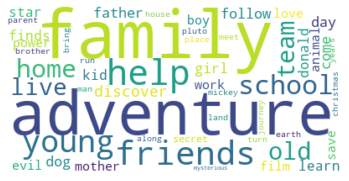

In [79]:
test = " ".join(word for word in dcount["description"])
print("There are {} words in the combination of all review".format(len(test)))

wordcloud = WordCloud(max_words=50, background_color="white", stopwords= stop).generate(test)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are a lot of interesting things from our descriptions. From looking at the top 50 words 